In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 5500)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [21]:
df = pd.read_csv('CPUC Data 2022.csv')
df = df.iloc[1:]

In [22]:
df.head()

,Utility,Outage Start,Full Restoration,Outage Duration,Outage Days,Outage Hours,Circuit Name,HFTD,TOTAL CUSTOMERS IMPACTED,RESIDENTIAL CUSTOMERS,COMMERCIAL/INDUSTRIAL CUSTOMERS,MEDICAL BASELINE CUSTOMERS,OTHER CUSTOMERS,Notes
1,SDG&E,10/5/13 6:02,10/5/13 14:55,"0 days,8 hrs,53 min",0.370,8.88,79,NaN,85,NaN,NaN,NaN,NaN,NaN
2,SDG&E,10/5/13 6:05,10/5/13 14:41,"0 days,8 hrs,36 min",0.358,8.60,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN
3,SDG&E,10/6/13 2:03,10/6/13 8:10,"0 days,6 hrs,7 min",0.255,6.12,79,NaN,83,NaN,NaN,NaN,NaN,NaN
4,SDG&E,10/6/13 2:10,10/6/13 8:10,"0 days,6 hrs,0 min",0.250,6.00,79,NaN,11,NaN,NaN,NaN,NaN,NaN
5,SDG&E,10/6/13 2:13,10/6/13 7:44,"0 days,5 hrs,31 min",0.230,5.52,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN


In [23]:
df.columns

Index(['Utility', 'Outage Start', 'Full Restoration ', 'Outage Duration', 'Outage Days', 'Outage Hours', 'Circuit Name', 'HFTD', 'TOTAL CUSTOMERS IMPACTED', 'RESIDENTIAL CUSTOMERS', 'COMMERCIAL/INDUSTRIAL CUSTOMERS', 'MEDICAL BASELINE CUSTOMERS', 'OTHER CUSTOMERS', 'Notes'], dtype='object')

In [24]:
df = df[['Utility' , 'Outage Start' , 'Outage Duration', 
         'Circuit Name' ,'TOTAL CUSTOMERS IMPACTED']]

In [25]:
df.head()

,Utility,Outage Start,Outage Duration,Circuit Name,TOTAL CUSTOMERS IMPACTED
1,SDG&E,10/5/13 6:02,"0 days,8 hrs,53 min",79,85
2,SDG&E,10/5/13 6:05,"0 days,8 hrs,36 min",TL 626 - CIRCUIT 238,2
3,SDG&E,10/6/13 2:03,"0 days,6 hrs,7 min",79,83
4,SDG&E,10/6/13 2:10,"0 days,6 hrs,0 min",79,11
5,SDG&E,10/6/13 2:13,"0 days,5 hrs,31 min",TL 626 - CIRCUIT 238,2


In [26]:
df.shape

(5211, 5)

In [27]:
df.dropna(inplace=True)

In [28]:
df.shape

(4618, 5)

In [29]:
df.reset_index(drop=True,inplace=True)

In [30]:
df.head()

,Utility,Outage Start,Outage Duration,Circuit Name,TOTAL CUSTOMERS IMPACTED
0,SDG&E,10/5/13 6:02,"0 days,8 hrs,53 min",79,85
1,SDG&E,10/5/13 6:05,"0 days,8 hrs,36 min",TL 626 - CIRCUIT 238,2
2,SDG&E,10/6/13 2:03,"0 days,6 hrs,7 min",79,83
3,SDG&E,10/6/13 2:10,"0 days,6 hrs,0 min",79,11
4,SDG&E,10/6/13 2:13,"0 days,5 hrs,31 min",TL 626 - CIRCUIT 238,2


In [31]:
df['TOTAL CUSTOMERS IMPACTED']

0          85
1           2
2          83
3          11
4           2
5           2
6          83
7          85
8           1
9         377
10        479
11        250
12         87
13          1
14          2
15          3
16          3
17         87
18          1
19         87
20         87
21         75
22        132
23        362
24         11
25        348
26          3
27       1131
28          0
29        491
30       1596
31       2132
32       1999
33          0
34       5243
35       1617
36       4401
37       2911
38         54
39        156
40       2242
41       1809
42       3407
43       1649
44       4489
45         14
46       1785
47        916
48          1
49       2261
50       2342
51       1014
52          0
53       2224
54        421
55         25
56       2800
57       1368
58          0
59       1844
60        514
61        533
62       4198
63          1
64       2287
65        207
66          1
67          2
68        465
69        262
70         34
71    

In [32]:
df['TOTAL CUSTOMERS IMPACTED'] = df['TOTAL CUSTOMERS IMPACTED'].apply(lambda x: x if isinstance(x,int) else x.replace(',',''))
df['TOTAL CUSTOMERS IMPACTED'] = df['TOTAL CUSTOMERS IMPACTED'].astype('int32')

In [33]:
df.dtypes

Utility                     object
Outage Start                object
Outage Duration             object
Circuit Name                object
TOTAL CUSTOMERS IMPACTED     int32
dtype: object

In [49]:
df['Outage Duration'][0]

'0 days,8 hrs,53 min'

In [48]:
[i.split(' ')[0] for i in df['Outage Duration'][0].split(',')]

['0', '8', '53']

In [ ]:
[24,1,1/60]

In [41]:
[i.split(' ')[0] for i in df['Outage Duration'][0].split(',')]

[['0', 'days'], ['8', 'hrs'], ['53', 'min']]

In [37]:
[int(i.split(' ')[0]) for i in df['Outage Duration'][0].split(',')]

[0, 8, 53]

In [51]:
hrs2 = np.array([int(i.split(' ')[0]) for i in df['Outage Duration'][0].split(',')])

In [52]:
hrs2

array([ 0,  8, 53])

In [53]:
hrs1 = np.array([24,1,0.0167])

In [57]:
sum(hrs1*hrs2)

8.8851

In [58]:
hrs1 = np.array([24,1,0.0167]) # 1/60
df['Out_Duration'] = 0
for index, row in df.iterrows():
    try:
        
        hrs2 = np.array([int(i.split(' ')[0]) for i in row['Outage Duration'].split(',')])
        outage = hrs1*hrs2
        df['Out_Duration'].iloc[index] = outage.sum()
    except:
        df['Out_Duration'].iloc[index] = 0
#         print(row['Outage Duration'],type(row['Outage Duration']))

In [59]:
df.head()

,Utility,Outage Start,Outage Duration,Circuit Name,TOTAL CUSTOMERS IMPACTED,Out_Duration
0,SDG&E,10/5/13 6:02,"0 days,8 hrs,53 min",79,85,8.8851
1,SDG&E,10/5/13 6:05,"0 days,8 hrs,36 min",TL 626 - CIRCUIT 238,2,8.6012
2,SDG&E,10/6/13 2:03,"0 days,6 hrs,7 min",79,83,6.1169
3,SDG&E,10/6/13 2:10,"0 days,6 hrs,0 min",79,11,6.0000
4,SDG&E,10/6/13 2:13,"0 days,5 hrs,31 min",TL 626 - CIRCUIT 238,2,5.5177


In [66]:
df['Outage Start'][0].split()[0].split('/')[-1]

'13'

In [67]:
df['Year'] = df['Outage Start'].apply(lambda x: int(x.split()[0].split('/')[-1]))

In [69]:
df.head(20)

,Utility,Outage Start,Outage Duration,Circuit Name,TOTAL CUSTOMERS IMPACTED,Out_Duration,Year
0,SDG&E,10/5/13 6:02,"0 days,8 hrs,53 min",79,85,8.8851,13
1,SDG&E,10/5/13 6:05,"0 days,8 hrs,36 min",TL 626 - CIRCUIT 238,2,8.6012,13
2,SDG&E,10/6/13 2:03,"0 days,6 hrs,7 min",79,83,6.1169,13
3,SDG&E,10/6/13 2:10,"0 days,6 hrs,0 min",79,11,6.0000,13
4,SDG&E,10/6/13 2:13,"0 days,5 hrs,31 min",TL 626 - CIRCUIT 238,2,5.5177,13
5,SDG&E,1/14/14 2:58,"1 days,8 hrs,6 min",TL 626 - CIRCUIT 238,2,32.1002,14
6,SDG&E,1/14/14 19:35,"0 days,19 hrs,31 min",79,83,19.5177,14
7,SDG&E,5/14/14 6:12,"1 days,8 hrs,18 min",79,85,32.3006,14
8,SDG&E,5/14/14 6:25,"0 days,13 hrs,3 min",238,1,13.0501,14
9,SDG&E,5/14/14 7:52,"0 days,10 hrs,28 min",222,377,10.4676,14


In [70]:
df['Year'] = df['Year'].replace([13,14,17,18,19,20,21],
                                [2013,2014,2017,2018,2019,2020,2021])

In [71]:
df.head(20)

,Utility,Outage Start,Outage Duration,Circuit Name,TOTAL CUSTOMERS IMPACTED,Out_Duration,Year
0,SDG&E,10/5/13 6:02,"0 days,8 hrs,53 min",79,85,8.8851,2013
1,SDG&E,10/5/13 6:05,"0 days,8 hrs,36 min",TL 626 - CIRCUIT 238,2,8.6012,2013
2,SDG&E,10/6/13 2:03,"0 days,6 hrs,7 min",79,83,6.1169,2013
3,SDG&E,10/6/13 2:10,"0 days,6 hrs,0 min",79,11,6.0000,2013
4,SDG&E,10/6/13 2:13,"0 days,5 hrs,31 min",TL 626 - CIRCUIT 238,2,5.5177,2013
5,SDG&E,1/14/14 2:58,"1 days,8 hrs,6 min",TL 626 - CIRCUIT 238,2,32.1002,2014
6,SDG&E,1/14/14 19:35,"0 days,19 hrs,31 min",79,83,19.5177,2014
7,SDG&E,5/14/14 6:12,"1 days,8 hrs,18 min",79,85,32.3006,2014
8,SDG&E,5/14/14 6:25,"0 days,13 hrs,3 min",238,1,13.0501,2014
9,SDG&E,5/14/14 7:52,"0 days,10 hrs,28 min",222,377,10.4676,2014


In [72]:
df = df[['Utility','Year','Out_Duration','Circuit Name','TOTAL CUSTOMERS IMPACTED']]

In [73]:
df.head()

,Utility,Year,Out_Duration,Circuit Name,TOTAL CUSTOMERS IMPACTED
0,SDG&E,2013,8.8851,79,85
1,SDG&E,2013,8.6012,TL 626 - CIRCUIT 238,2
2,SDG&E,2013,6.1169,79,83
3,SDG&E,2013,6.0000,79,11
4,SDG&E,2013,5.5177,TL 626 - CIRCUIT 238,2


In [82]:
df[df['Year']==2020]['Circuit Name'].nunique()

713

In [81]:
len(df[df['Year']==2020]['Circuit Name'].unique())

713

In [80]:
df.groupby('Year').agg(
             circuit_impacted =('Circuit Name', lambda x: x.nunique()),
             CUSTOMERS_IMPACTED=('TOTAL CUSTOMERS IMPACTED', 'sum'),
             Average_outage = ('Out_Duration','mean') ,
             Max_outage = ('Out_Duration','max'),
             Utility_reporting = ('Utility',lambda x: ','.join(x.unique()))
)

,circuit_impacted,CUSTOMERS_IMPACTED,Average_outage,Max_outage,Utility_reporting
Year,,,,,
2013,2,183,7.024180,8.8851,SDG&E
2014,6,1367,15.764060,32.3006,SDG&E
2017,28,20820,36.086342,144.8684,SDG&E
2018,78,84565,37.386482,93.6847,"PG&E,SDG&E"
2019,1585,2230459,48.133907,143.4175,"SCE,PG&E,SDG&E"
2020,713,982057,28.077572,133.8350,"SCE,PG&E,SDG&E,PacifiCorp,SDGE,PGE"
2021,292,198182,34.271416,184.0167,"SCE,PG&E,PacifiCorp"


In [83]:
total = df['TOTAL CUSTOMERS IMPACTED'].sum()
df.groupby('Utility').agg(
             Customer_Served =('TOTAL CUSTOMERS IMPACTED', 'sum'),
             per_CUSTOMERS_served =('TOTAL CUSTOMERS IMPACTED', lambda x: round(x.sum()/total,4)),
             psps_outage = ('Out_Duration','sum') ,
             average_psps_duration = ('Out_Duration','mean')
)

,Customer_Served,per_CUSTOMERS_served,psps_outage,average_psps_duration
Utility,,,,
PG&E,2788077,0.7926,114517.1788,45.898669
PGE,617,0.0002,97.9038,19.580760
PacifiCorp,4512,0.0013,318.7254,12.749016
SCE,528843,0.1503,44119.5497,25.240017
SDG&E,99282,0.0282,7191.5440,32.394342
SDGE,96302,0.0274,3736.5255,30.378256


In [84]:
df_cross = pd.crosstab(index=df['Year'],
           columns=df['Utility'],values=df['TOTAL CUSTOMERS IMPACTED'],aggfunc='sum')

In [85]:
df_cross

Utility,PG&E,PGE,PacifiCorp,SCE,SDG&E,SDGE
Year,,,,,,
2013,NaN,NaN,NaN,NaN,183.0,NaN
2014,NaN,NaN,NaN,NaN,1367.0,NaN
2017,NaN,NaN,NaN,NaN,20820.0,NaN
2018,60086.0,NaN,NaN,NaN,24479.0,NaN
2019,1999213.0,NaN,NaN,183235.0,48011.0,NaN
2020,649089.0,617.0,2559.0,229068.0,4422.0,96302.0
2021,79689.0,NaN,1953.0,116540.0,NaN,NaN


In [86]:
df_cross.fillna(0,inplace=True)

In [87]:
df_cross

Utility,PG&E,PGE,PacifiCorp,SCE,SDG&E,SDGE
Year,,,,,,
2013,0.0,0.0,0.0,0.0,183.0,0.0
2014,0.0,0.0,0.0,0.0,1367.0,0.0
2017,0.0,0.0,0.0,0.0,20820.0,0.0
2018,60086.0,0.0,0.0,0.0,24479.0,0.0
2019,1999213.0,0.0,0.0,183235.0,48011.0,0.0
2020,649089.0,617.0,2559.0,229068.0,4422.0,96302.0
2021,79689.0,0.0,1953.0,116540.0,0.0,0.0


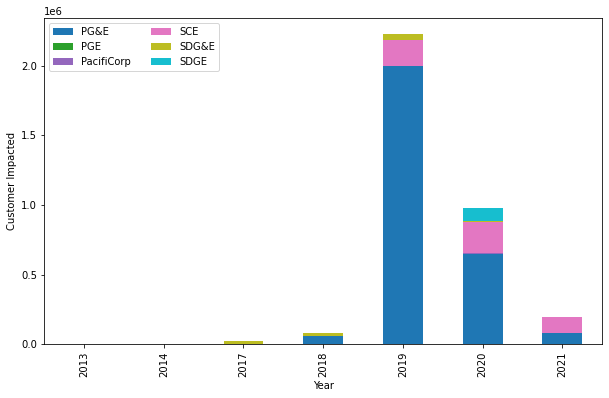

In [88]:
df_cross.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Year")
plt.ylabel("Customer Impacted")
plt.show()